# DSCI 100 GROUP PROJECT

Project Authors: Kevan Waduwara, Khushi Mittal, Kenny Tsan, Kian Karimiseffat

## INTRODUCTION

Efficiently managing a video game research server requires a strong understanding of player behavior, particularly when it comes to forecasting demand. The goal of this project is to contribute to a larger initiative by a UBC Computer Science research group, which is using Minecraft to study how people interact within virtual worlds. One of the key operational challenges is ensuring the server has enough resources—such as software licenses—to accommodate all players who are online at the same time. Therefore, understanding when the server is likely to experience high player activity is essential for smooth and cost-effective operations.

To support this goal, the dataset provided includes two main files: players.csv, which contains demographic and behavior-related data for each individual player, and sessions.csv, which logs every play session with detailed time information such as session start and end times. Together, these datasets offer a rich foundation for analyzing patterns in player activity.

The broad question guiding this project is: *What time windows are most likely to have large numbers of simultaneous players? This demand forecasting can inform decisions about how many software licenses and hardware resources are needed at different times.*

To contribute to this goal, the specific question we will explore is: *Can the time a session has started be used to predict how long that session will last?* By understanding this relationship, we can gain insight into not just when players are likely to join the server, but also how long they tend to stay, which together can help estimate player concurrency during various time periods.

Through this project, we aim to uncover meaningful patterns in session behavior that will help the stakeholders better allocate resources and prepare for high-demand periods on the server.



In [2]:
library(tidyverse)
library(lubridate)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read.csv("https://raw.githubusercontent.com/kiank710/Individual_Assignment/refs/heads/main/players.csv")
sessions <- read.csv("https://raw.githubusercontent.com/kiank710/Individual_Assignment/refs/heads/main/sessions.csv")

#### DESCRIPTION OF DATA SETS USED

In [4]:
players_data <- data.frame(
  Variable = c("experience", "subscription", "hashedEmail", "played_hours", "name", "gender", "age"),
  Description = c(
    "Player's skill level (beginner, amateur, veteran, regular, pro)",
    "Whether the player subscribed to the newsletter (True/False)",
    "Encrypted player email for privacy (my interpretation)",
    "Total hours the player has played",
    "Player's name in the game",
    "Gender of the player",
    "Age of the player"
  ),
  Type = c("Character", "Boolean", "Character", "Numeric", "Character", "Character", "Numeric")
)

print("The players data set contains 196 rows and 7 columns. That means that the data set has 196 observations. Following is a table summing up all the variables- one line description explaining what the variable is storing and data type for the variable.")
players_data

[1] "The players data set contains 196 rows and 7 columns. That means that the data set has 196 observations. Following is a table summing up all the variables- one line description explaining what the variable is storing and data type for the variable."


Variable,Description,Type
<chr>,<chr>,<chr>
experience,"Player's skill level (beginner, amateur, veteran, regular, pro)",Character
subscription,Whether the player subscribed to the newsletter (True/False),Boolean
hashedEmail,Encrypted player email for privacy (my interpretation),Character
played_hours,Total hours the player has played,Numeric
name,Player's name in the game,Character
gender,Gender of the player,Character
age,Age of the player,Numeric


In [5]:
sessions_data <- data.frame(
  Variable = c("hashedEmail", "start_time", "end_time", "original_start_time", "original_end_time"),
  Description = c(
    "Encrypted player email for privacy (my interpretation)",
    "Time when player started playing (24 hrs)",
    "Time when player stopped playing (24 hrs)",
    "Original time when player started playing ",
    "Original time when player stopped playing "
  ),
  Type = c("Character", "Numeric", "Numeric", "Numeric", "Numeric")
)

print("The sessions data set contains 1535 rows and 5 columns. That means that the data set has 1535 observations. Following is a table summing up all the variables- one line description explaining what the variable is storing and data type for the variable.")
sessions_data

[1] "The sessions data set contains 1535 rows and 5 columns. That means that the data set has 1535 observations. Following is a table summing up all the variables- one line description explaining what the variable is storing and data type for the variable."


Variable,Description,Type
<chr>,<chr>,<chr>
hashedEmail,Encrypted player email for privacy (my interpretation),Character
start_time,Time when player started playing (24 hrs),Numeric
end_time,Time when player stopped playing (24 hrs),Numeric
original_start_time,Original time when player started playing,Numeric
original_end_time,Original time when player stopped playing,Numeric


In [6]:
players_tidy <- players |>
select(experience, hashedEmail, played_hours, Age) |>
as_tibble()
players_tidy

experience,hashedEmail,played_hours,Age
<chr>,<chr>,<dbl>,<int>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,9
Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,17
Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,17
Amateur,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,21
Regular,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,21
Amateur,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,17
Regular,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,19
Amateur,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,21
Amateur,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,17


In [7]:
mean_players <- players_tidy |>
summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))
mean_players

mean_played_hours
<dbl>
5.845918


In [10]:
sessions <- sessions |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    session_duration = as.numeric(difftime(end_time, start_time, units = "mins")),
    hour_of_day = hour(start_time),
    day_of_week = wday(start_time, label = TRUE)) |>
  filter(!is.na(session_duration) & session_duration > 0)

combined <- inner_join(sessions, players, by = "hashedEmail") |>
  filter(!is.na(experience))

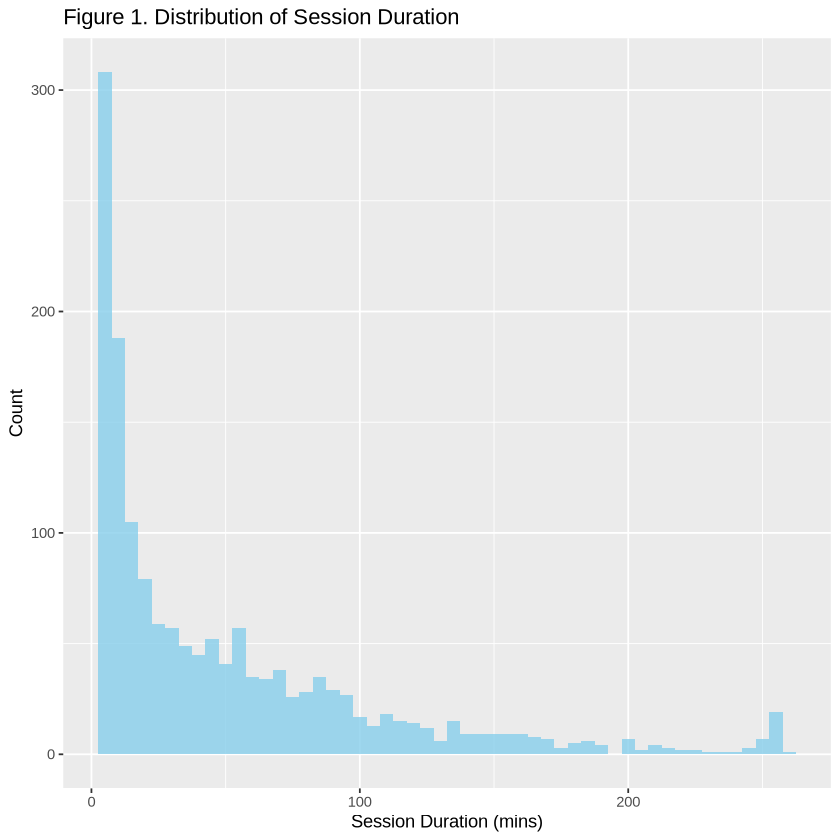

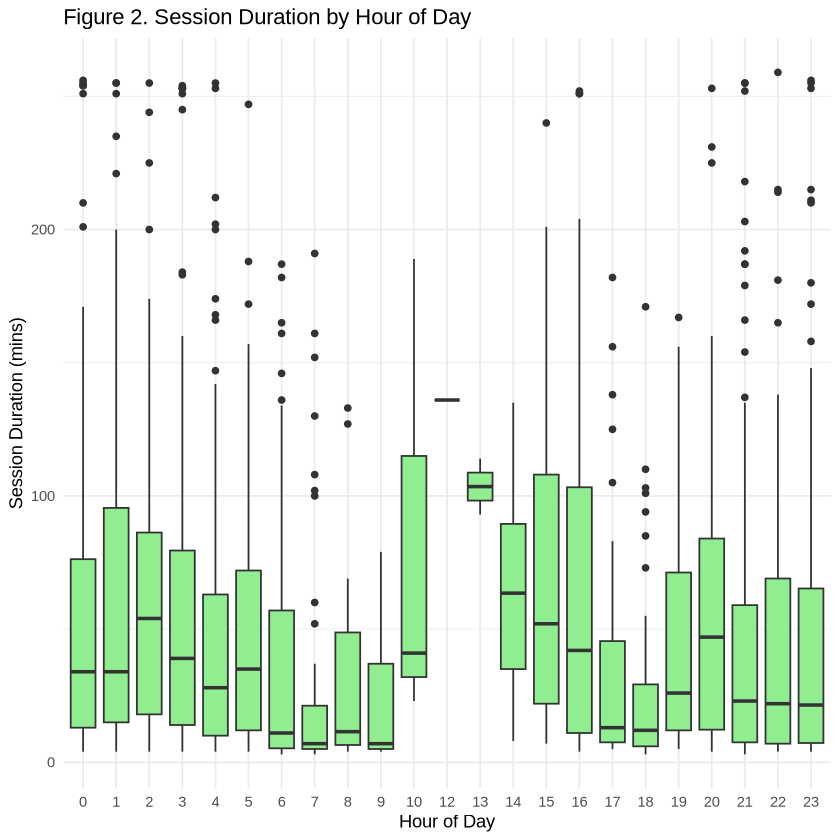

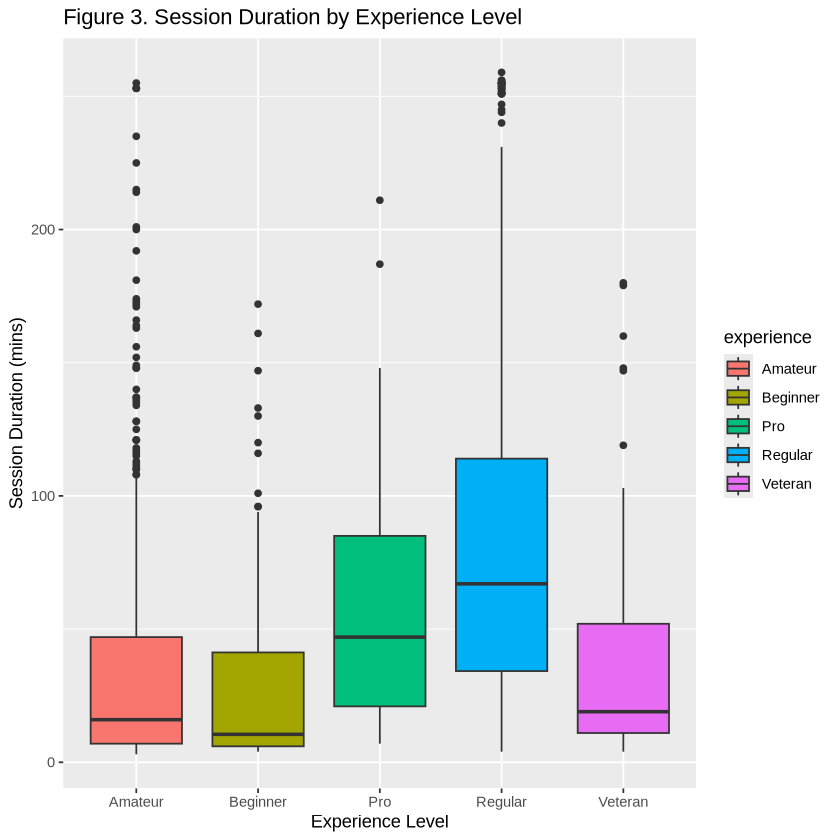

In [11]:
ggplot(combined, aes(x = session_duration)) +
  geom_histogram(binwidth = 5, fill = "skyblue", alpha = 0.8) +
  labs(title = "Figure 1. Distribution of Session Duration", x = "Session Duration (mins)", y = "Count")

ggplot(combined, aes(x = factor(hour_of_day), y = session_duration)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Figure 2. Session Duration by Hour of Day", x = "Hour of Day", y = "Session Duration (mins)") +
  theme_minimal()

ggplot(combined, aes(x = experience, y = session_duration, fill = experience)) +
  geom_boxplot() +
  labs(title = "Figure 3. Session Duration by Experience Level", x = "Experience Level", y = "Session Duration (mins)")

In [12]:
combined |>
  summarise(mean_duration = mean(session_duration), sd_duration = sd(session_duration))

mean_duration,sd_duration
<dbl>,<dbl>
50.85845,55.57357


In [13]:
model_data <- combined |>
  select(session_duration, hour_of_day, day_of_week, experience)

model_data <- model_data |>
  mutate(day_of_week = factor(day_of_week), experience = factor(experience))

set.seed(123)
split <- initial_split(model_data, prop = 0.8)
train <- training(split)
test <- testing(split)

lm_model <- linear_reg() |>
  set_engine("lm") |>
  fit(session_duration ~ hour_of_day + day_of_week + experience, data = train)

results <- predict(lm_model, test) |>
  bind_cols(test)

metrics <- metrics(results, truth = session_duration, estimate = .pred)
metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,45.4855354
rsq,standard,0.2409849
mae,standard,35.3622128


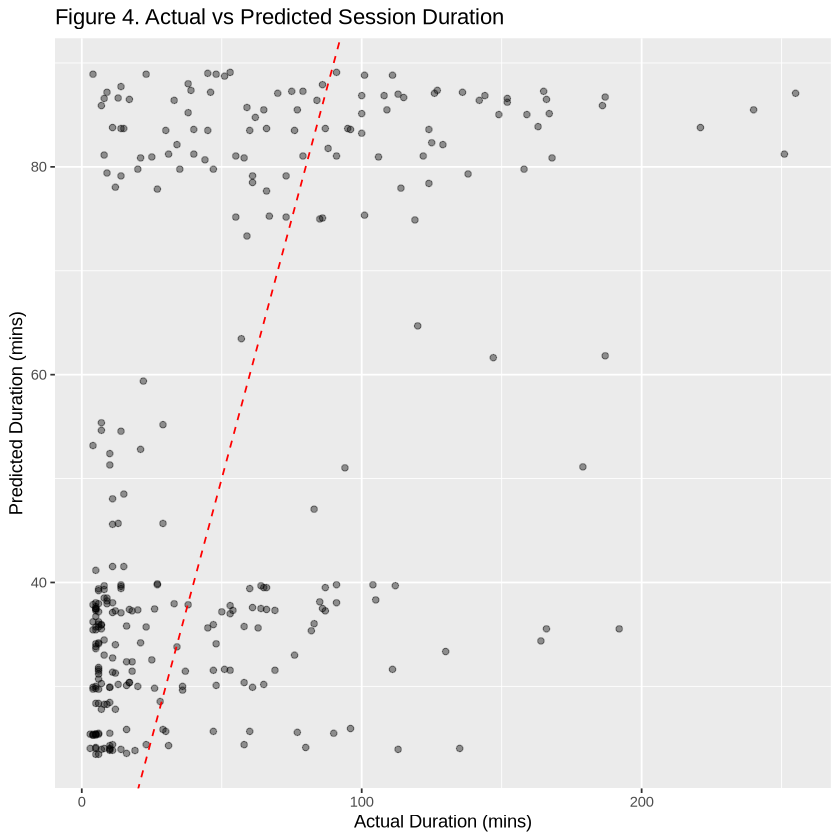

In [14]:
ggplot(results, aes(x = session_duration, y = .pred)) +
  geom_point(alpha = 0.4) +
  geom_abline(color = "red", linetype = "dashed") +
  labs(title = "Figure 4. Actual vs Predicted Session Duration", x = "Actual Duration (mins)", y = "Predicted Duration (mins)")

In [15]:
knn_recipe <- recipe(session_duration ~ hour_of_day + day_of_week + experience, data = combined) |>
  step_dummy(all_nominal_predictors()) |>
  step_normalize(all_predictors())

In [16]:
set.seed(123)
split <- initial_split(combined, prop = 0.8)
train <- training(split)
test <- testing(split)

In [17]:
knn_model <- nearest_neighbor(mode = "regression", neighbors = 5) |>
  set_engine("kknn")

In [18]:
knn_workflow <- workflow() |>
  add_model(knn_model) |>
  add_recipe(knn_recipe)

knn_fit <- fit(knn_workflow, data = train)

In [19]:
knn_results <- predict(knn_fit, test) |>
  bind_cols(test)

knn_metrics <- metrics(knn_results, truth = session_duration, estimate = .pred)
knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,51.9692290
rsq,standard,0.1452493
mae,standard,38.0430819


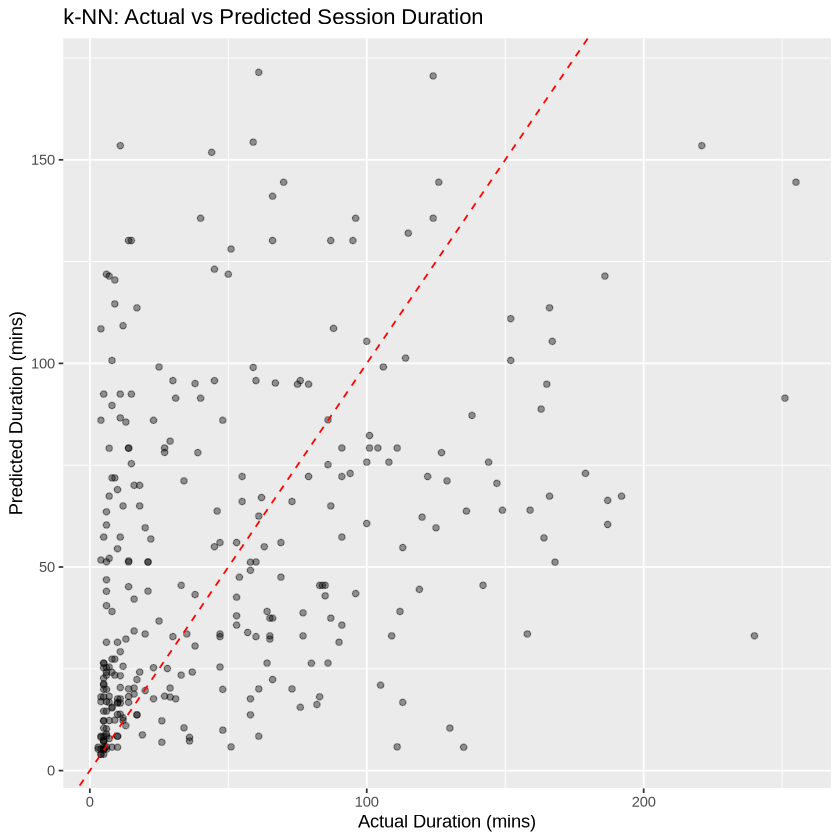

In [20]:
ggplot(knn_results, aes(x = session_duration, y = .pred)) +
  geom_point(alpha = 0.4) +
  geom_abline(color = "red", linetype = "dashed") +
  labs(title = "k-NN: Actual vs Predicted Session Duration", 
       x = "Actual Duration (mins)", 
       y = "Predicted Duration (mins)")

In [21]:
tune_spec <- nearest_neighbor(mode = "regression", neighbors = tune()) |>
  set_engine("kknn")

grid <- grid_regular(neighbors(range = c(3, 25)), levels = 10)

tune_workflow <- workflow() |>
  add_model(tune_spec) |>
  add_recipe(knn_recipe)

tuned <- tune_grid(tune_workflow, resamples = vfold_cv(train, v = 5), grid = grid)

collect_metrics(tuned)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,63.92383870,5,1.460685503,Preprocessor1_Model01
3,rsq,standard,0.04625405,5,0.006368185,Preprocessor1_Model01
5,rmse,standard,58.42028278,5,1.390033930,Preprocessor1_Model02
5,rsq,standard,0.07589562,5,0.010079330,Preprocessor1_Model02
7,rmse,standard,56.53347750,5,1.140293637,Preprocessor1_Model03
7,rsq,standard,0.09291411,5,0.009844458,Preprocessor1_Model03
10,rmse,standard,54.82355296,5,1.390792869,Preprocessor1_Model04
10,rsq,standard,0.11136769,5,0.015905678,Preprocessor1_Model04
12,rmse,standard,54.13382055,5,1.434294257,Preprocessor1_Model05


In [22]:
show_best(tuned, metric = "rmse")

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,rmse,standard,52.36053,5,1.467819,Preprocessor1_Model10
22,rmse,standard,52.52596,5,1.448792,Preprocessor1_Model09
20,rmse,standard,52.68409,5,1.452151,Preprocessor1_Model08
17,rmse,standard,53.12128,5,1.454693,Preprocessor1_Model07
15,rmse,standard,53.33166,5,1.421621,Preprocessor1_Model06


In [26]:
knn_recipe <- recipe(session_duration ~ hour_of_day + day_of_week + experience, data = combined) |>
  step_dummy(all_nominal_predictors()) |>
  step_normalize(all_predictors())

set.seed(123)
split <- initial_split(combined, prop = 0.8)
train <- training(split)
test <- testing(split)

knn_model_25 <- nearest_neighbor(mode = "regression", neighbors = 25) |>
  set_engine("kknn")

knn_workflow_25 <- workflow() |>
  add_model(knn_model_25) |>
  add_recipe(knn_recipe)

knn_fit_25 <- fit(knn_workflow_25, data = train)

knn_results_25 <- predict(knn_fit_25, test) |>
  bind_cols(test)

knn_metrics <- metrics(knn_results_25, truth = session_duration, estimate = .pred)
knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,47.3931880
rsq,standard,0.1903907
mae,standard,36.4134656


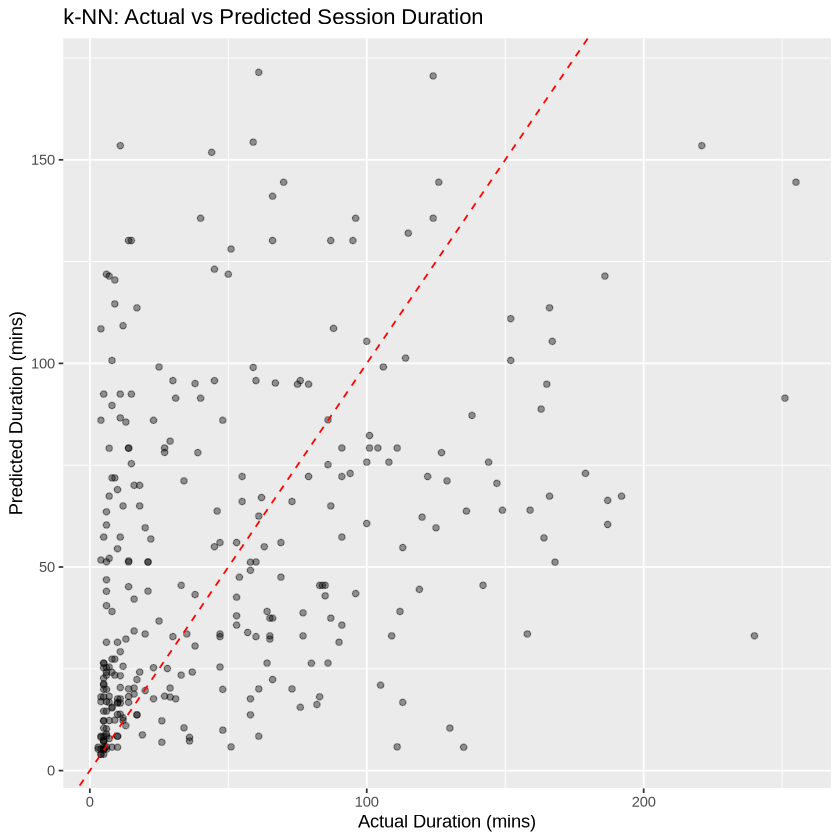

In [27]:
ggplot(knn_results, aes(x = session_duration, y = .pred)) +
  geom_point(alpha = 0.4) +
  geom_abline(color = "red", linetype = "dashed") +
  labs(title = "k-NN: Actual vs Predicted Session Duration", 
       x = "Actual Duration (mins)", 
       y = "Predicted Duration (mins)")